In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

In [4]:
df = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/Data_sets/Crop_recommendation.csv")

In [5]:
X = df.drop("label", axis = 1)
y = df["label"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [12]:
print(f"Validation Accuracy: {accuracy*100 :.2f}%")
print(classification_report(y_test, y_pred))

Validation Accuracy: 99.32%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14

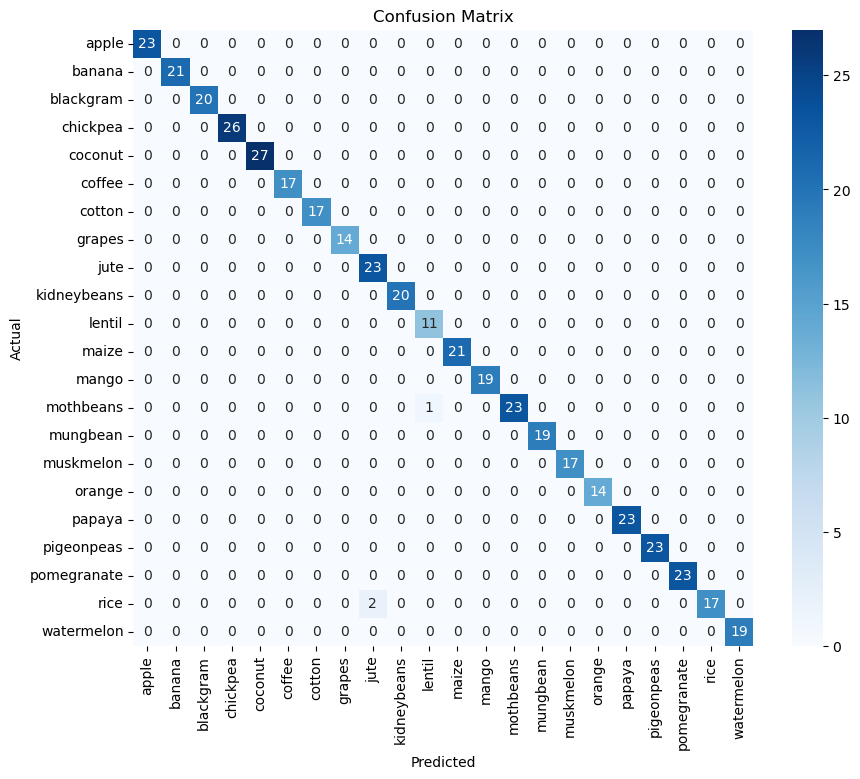

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation Accuracy:", scores.mean())


Cross-validation Accuracy: 0.9945454545454545


In [23]:
input_data = {
    "N": 90,
    "P": 40,
    "K": 35,
    "temperature": 30,
    "humidity": 70,
    "ph": 6.5,
    "rainfall": 200
}

input_df = pd.DataFrame([input_data])


In [24]:
predicted_crop = model.predict(input_df)
print(f"Recommended Crop: {predicted_crop[0]}")

Recommended Crop: coffee


In [27]:
joblib.dump(model, "crop_recommendation.pkl")
print("SAVED")

SAVED
